# Introduction

Apprentissage polynomiale pour une fonction dùune variable réelle.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import minimize

## Génération des données

In [4]:
def cible(x):
    return 1. / (1. + np.sqrt(x))

In [5]:
points = np.linspace(0, 1., 10)
valeurs = cible(points)
donnees = valeurs + 0.1 * np.random.randn(10)

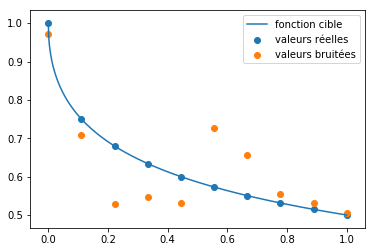

In [6]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.legend()

## Phase d'apprentissage

In [11]:
def generation_polynome(params):
    def mon_polynome(points):
        poly_val = 0
        #for k, a in enumerate(params):
        #   poly_val += a * point ** k
        for coeff in reversed(params):
            poly_val = coeff + points * poly_val
        return poly_val
    return mon_polynome

In [12]:
def erreur(params):
    mon_polynome = generation_polynome(params)
    #for point, donnee in zip(points, donnees):
    #    resultat += (donnee - mon_polynome(point)) ** 2
    diff = donnees - mon_polynome(points)
    return np.sum(diff * diff)
            

In [13]:
param_opt = minimize(fun=erreur, x0=np.zeros(shape=(5,)))

In [14]:
param_opt

      fun: 0.018010617919893706
 hess_inv: array([[ 4.58596637e-01, -4.96184072e+00,  1.62897843e+01,
        -2.06066804e+01,  8.83492680e+00],
       [-4.96184072e+00,  1.14018113e+02, -4.82098136e+02,
         6.95749932e+02, -3.23852701e+02],
       [ 1.62897843e+01, -4.82098136e+02,  2.22723109e+03,
        -3.37915543e+03,  1.62499615e+03],
       [-2.06066804e+01,  6.95749932e+02, -3.37915543e+03,
         5.28734900e+03, -2.59742746e+03],
       [ 8.83492680e+00, -3.23852701e+02,  1.62499615e+03,
        -2.59742746e+03,  1.29586079e+03]])
      jac: array([ 1.00350007e-07, -4.91738319e-07,  7.26431608e-08,  2.27708369e-07,
        2.23517418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 238
      nit: 30
     njev: 34
   status: 0
  success: True
        x: array([  0.991338  ,  -4.35991511,  14.07655082, -17.06182405,
         6.85238133])

In [15]:
param_opt.x

array([  0.991338  ,  -4.35991511,  14.07655082, -17.06182405,
         6.85238133])

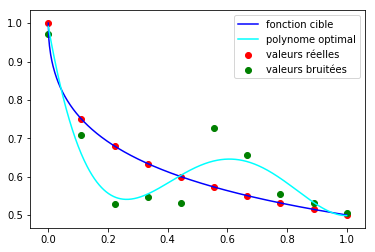

In [16]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, color="blue", label="fonction cible")
plt.scatter(points, valeurs, color="red", label="valeurs réelles")
plt.scatter(points, donnees, color="green", label="valeurs bruitées")
poly_opt = generation_polynome(param_opt.x)
plt.plot(x, poly_opt(x), color="cyan", label="polynome optimal")
plt.legend()

## Exercice

1. Reprendre le code pour obtenir le graphique à partir de la taille de l'échantillon et le degrés du polynome.
2. Pour une taille d'échantillon donnée, étudier l'impact de la variation du degrés du polynome sur la valeur de la fonction d'erreur et sur l'erreur visuelle avec la fonction cible.

In [25]:
def cible(x):
    return 1. / (1. + np.sqrt(x))

def generation_echantillon(taille):
    points = np.linspace(0, 1., taille)
    valeurs = cible(points)
    donnees = valeurs + 0.1 * np.random.randn(taille)
    return points, valeurs, donnees

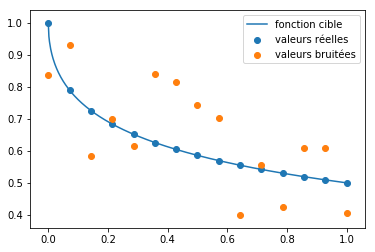

In [26]:
points, valeurs, donnees = generation_echantillon(15)

x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.legend()

### Utilisation de la POO pour simplifier l'utilisation

In [20]:
class Modele:
    def __init__(
        self, 
        fonction_cible, 
        taille_echantillon,
    ):
        self.cible = fonction_cible
        self.taille = taille_echantillon
        self.points = np.linspace(0, 1., self.taille)
        self.valeurs = cible(self.points)
        self.donnees = self.valeurs + 0.1 * np.random.randn(self.taille)
        
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.cible(x)
        repere.plot(x, y, label="fonction cible")
        repere.scatter(self.points, self.valeurs, label="valeurs réelles")
        repere.scatter(self.points, self.donnees, label="valeurs bruitées")
        

In [21]:
m = Modele(fonction_cible=cible, taille_echantillon=10)

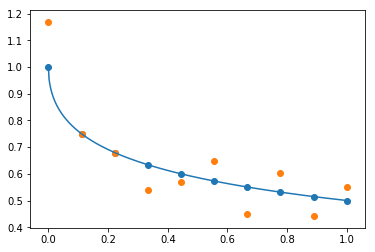

In [22]:
fig, rep = plt.subplots()
m.affichage(rep)

In [27]:
def generation_polynome(params):
    def mon_polynome(points):
        poly_val = 0
        for coeff in reversed(params):
            poly_val = coeff + points * poly_val
        return poly_val
    return mon_polynome

class Apprentissage:
    def __init__(self, degres, modele):
        self.degres = degres
        self.modele = modele
        intermed = minimize(
            fun=self.erreur, 
            x0=np.zeros(shape=(self.degres + 1,))
        )
        self.params = intermed.x
        print(intermed.message)
        print(intermed.fun)
        self.evaluation = generation_polynome(self.params)
        
    def erreur(self, params):
        mon_polynome = generation_polynome(params)
        diff = self.modele.donnees - mon_polynome(self.modele.points)
        return np.sum(diff * diff)

    
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.evaluation(x)
        repere.plot(x, y, label="polynome optimal")
        repere.set_title(f"echantillon={self.modele.taille} degres={self.degres}")



In [28]:
mod = Modele(fonction_cible=cible, taille_echantillon=10)

In [29]:
def variation_degres(degres):
    fig, rep = plt.subplots()
    mod.affichage(rep)
    res = Apprentissage(degres=degres, modele=mod)
    res.affichage(rep)
    rep.legend()


Optimization terminated successfully.
0.03619450777843221


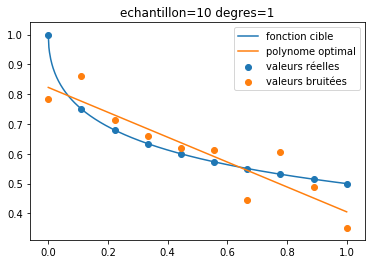

In [30]:
variation_degres(1)

Optimization terminated successfully.
0.0361726210037497


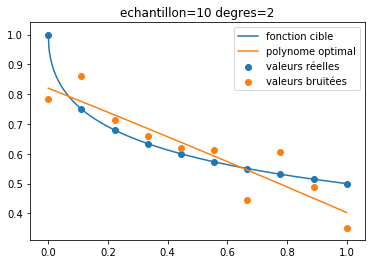

In [31]:
variation_degres(2)

Optimization terminated successfully.
0.0354796599153182


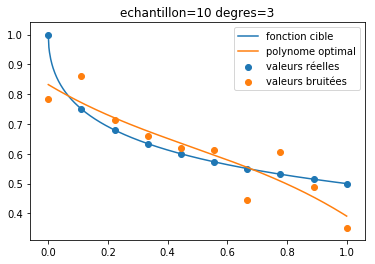

In [32]:
variation_degres(3)

Optimization terminated successfully.
0.019871694063418054


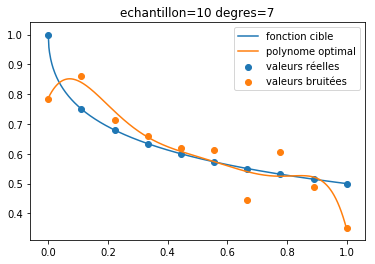

In [33]:
variation_degres(7)

Optimization terminated successfully.
0.009359654418494871


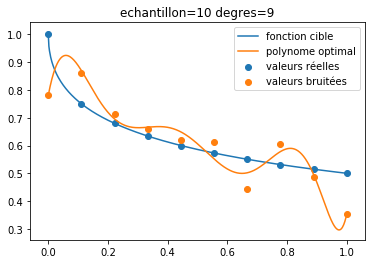

In [37]:
variation_degres(9)

Optimization terminated successfully.
0.0017739137018727062


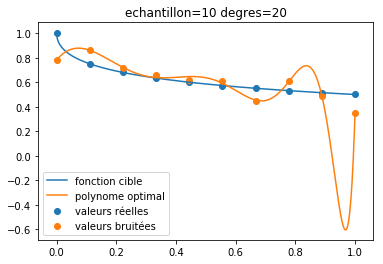

In [35]:
variation_degres(20)

Optimization terminated successfully.
0.0011699375800627643


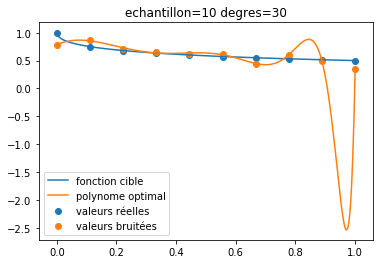

In [36]:
variation_degres(30)

**Remarque** Alors que l'erreur sur les points d'apprentissage est de plus en plus petite, on observe des problèmes entre les points.

# Exercice 
- Reprener les classes Modele et Apprentissage pour diviser l'échantillon entre une partie destinée à l'apprentissage du modèle et une partie pour sa validation a posterriori.
- Afficher les courbes d'erreur sur les données d'entrainement et les données de test en fonction du degrés du polynôme.

In [40]:
from random import random

class Modele:
    def __init__(
        self, 
        fonction_cible, 
        taille_echantillon=20,
        proportion_apprentissage=0.5,
    ):
        self.cible = fonction_cible
        self.taille = taille_echantillon
        self._points = np.linspace(0, 1., self.taille)
        self._valeurs = cible(self._points)
        self._donnees = self._valeurs + 0.1 * np.random.randn(self.taille)
        points_app, points_test, donnees_app, donnees_test = [], [], [], []
        for point, donnee in zip(self._points, self._donnees):
            if random() < proportion_apprentissage:
                points_app.append(point)
                donnees_app.append(donnee)
            else:
                points_test.append(point)
                donnees_test.append(donnee)
        self.points_app = np.array(points_app)
        self.points_test = np.array(points_test)
        self.donnees_app = np.array(donnees_app)
        self.donnees_test = np.array(donnees_test)
        
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.cible(x)
        repere.plot(x, y, label="fonction cible")
        repere.scatter(self._points, self._valeurs, label="valeurs réelles")
        repere.scatter(
            self.points_app, 
            self.donnees_app, 
            label="échantillon apprentissage"
        )
        repere.scatter(
            self.points_test, 
            self.donnees_test, 
            label="échantillon test"
        )

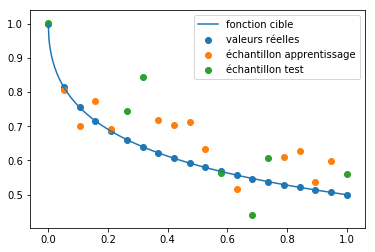

In [41]:
m = Modele(fonction_cible=cible)
fig, rep = plt.subplots()
m.affichage(rep)
rep.legend()

In [99]:
def generation_polynome(params):
    def mon_polynome(points):
        poly_val = 0
        for coeff in reversed(params):
            poly_val = coeff + points * poly_val
        return poly_val
    return mon_polynome

class Apprentissage:
    def __init__(self, degres, modele):
        self.degres = degres
        self.modele = modele
        intermed = minimize(
            fun=self._erreur_app, 
            x0=np.zeros(shape=(self.degres + 1,))
        )
        self.params = intermed.x
        #print(intermed.message)
        self.evaluation = generation_polynome(self.params)
        self.erreur_test = self._erreur_test(self.params)
        self.erreur_app = self._erreur_app(self.params)
        
    def _erreur_test(self, params):
        mon_polynome = generation_polynome(params)
        diff = self.modele.donnees_test - mon_polynome(self.modele.points_test)
        return np.sum(diff * diff) / len(self.modele.points_test)

    def _erreur_app(self, params):
        mon_polynome = generation_polynome(params)
        diff = self.modele.donnees_app - mon_polynome(self.modele.points_app)
        return np.sum(diff * diff) / len(self.modele.points_app)

    
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.evaluation(x)
        repere.plot(x, y, label=f"polynome optimal degres={self.degres}")
   



In [100]:
m = Modele(fonction_cible=cible)

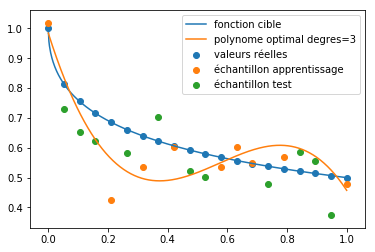

In [101]:
app = Apprentissage(degres=3, modele=m)
fig, rep = plt.subplots()
m.affichage(rep)
app.affichage(rep)
rep.legend()

In [102]:
print(f"Erreur de test : {app.erreur_test}")
print(f"Erreur d'apprentissage' : {app.erreur_app}")

Erreur de test : 0.009578830668604953
Erreur d'apprentissage' : 0.004334876379184071


In [103]:
def erreur_vs_degres(taille_echantillon, degres_max):
    fig, (rep1, rep2) = plt.subplots(nrows=2, figsize=(10, 10))
    modele = Modele(
        fonction_cible=cible, 
        taille_echantillon=taille_echantillon,
        proportion_apprentissage=0.7,
    )
    modele.affichage(rep1)
    rep1.legend()
    apps = list()
    degres = list(range(1, 1 + degres_max))
    erreurs_test = list()
    erreurs_app = list()
    for deg in degres:
        app = Apprentissage(degres=deg, modele=modele)
        erreurs_test.append(app.erreur_test)
        erreurs_app.append(app.erreur_app)
        apps.append(app)
        
    
    rep2.semilogy(degres, erreurs_test, label="erreurs tests")
    rep2.semilogy(degres, erreurs_app, label='erreurs apprentissage')
    rep2.legend()
    return modele, apps
        

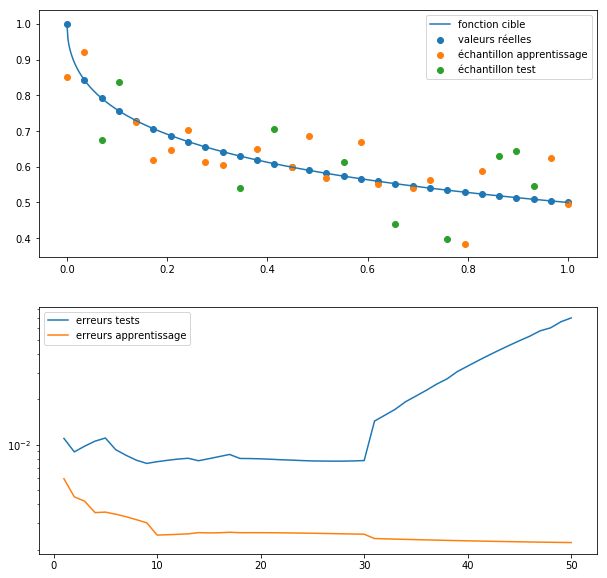

In [106]:
mod, apps = erreur_vs_degres(taille_echantillon=30, degres_max=50)

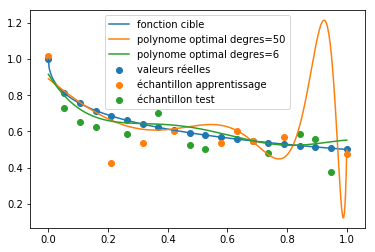

In [107]:
fig, rep = plt.subplots()
m.affichage(rep)
apps[-1].affichage(rep)
apps[5].affichage(rep)
rep.legend()

# Conclusion
- Lorsqu'on augmente la complexité du modèle on dimininue toujours l'erreur d'apprentissage.
- Par contre l'erreur sur les données de test dimininue dans un premier temps avant de se mettre à augmenter à cause de la sensibilité au bruit lorsqu'il y a beaucoup de paramètres. On dit qu'on est en situation d'overfitting. 
- On cherchera toujours à diviser son échantillon en 2, une partie pour l'apprentissage et une partie qui permettra de vérifier à post erriori que l'on est pas en situation d'overfitting.

# Exercice 
- Augmenter le bruit, la taille de l'échantillon et le degrés du modèle, pour voir si la présence de bruit rend impossible l'apprentissage.
- Reprendre le code précédent en utilisant la bibliothèque [`scikit_learn`](https://scikit-learn.org/stable/) (On pourra regarder les mots clés`train_test_split`, `LinearRegression`, `PolynomialFeatures`)
- Utiliser le théorème de Bayes pour justifier le choix de l'erreur quadratique moyenne et analyser la convergence de l'apprentissage.

In [112]:
from random import random

class Modele:
    def __init__(
        self, 
        fonction_cible, 
        taille_echantillon=20,
        proportion_apprentissage=0.5,
        taille_bruit=0.1,
    ):
        self.cible = fonction_cible
        self.taille = taille_echantillon
        self._points = np.linspace(0, 1., self.taille)
        self._valeurs = self.cible(self._points)
        self._donnees = self._valeurs + taille_bruit * np.random.randn(self.taille)
        points_app, points_test, donnees_app, donnees_test = [], [], [], []
        for point, donnee in zip(self._points, self._donnees):
            if random() < proportion_apprentissage:
                points_app.append(point)
                donnees_app.append(donnee)
            else:
                points_test.append(point)
                donnees_test.append(donnee)
        self.points_app = np.array(points_app)
        self.points_test = np.array(points_test)
        self.donnees_app = np.array(donnees_app)
        self.donnees_test = np.array(donnees_test)
        
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.cible(x)
        repere.plot(x, y, label="fonction cible")
        repere.scatter(self._points, self._valeurs, label="valeurs réelles")
        repere.scatter(
            self.points_app, 
            self.donnees_app, 
            label="échantillon apprentissage"
        )
        repere.scatter(
            self.points_test, 
            self.donnees_test, 
            label="échantillon test"
        )

In [113]:
mod = Modele(
    fonction_cible=lambda x: np.sin(5. * x) * np.sin(np.sqrt(2) * x),
    taille_echantillon=50,
    proportion_apprentissage=0.6,
    taille_bruit=1.
)

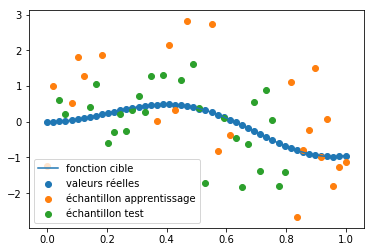

In [114]:
fig, rep = plt.subplots()
mod.affichage(rep)
rep.legend()

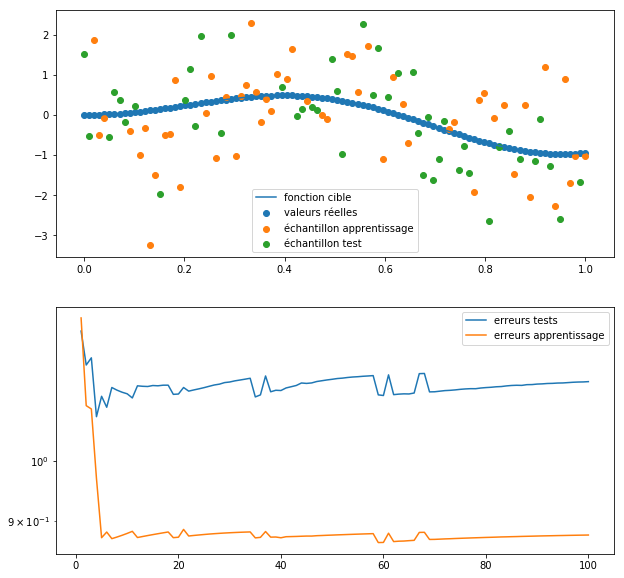

In [119]:
degres_max = 100
taille = 100
fig, (rep1, rep2) = plt.subplots(nrows=2, figsize=(10, 10))
mod = Modele(
    fonction_cible=lambda x: np.sin(5. * x) * np.sin(np.sqrt(2) * x),
    taille_echantillon=taille,
    proportion_apprentissage=0.6,
    taille_bruit=1.
)
mod.affichage(rep1)
rep1.legend()
apps = list()
degres = list(range(1, 1 + degres_max))
erreurs_test = list()
erreurs_app = list()
for deg in degres:
    app = Apprentissage(degres=deg, modele=mod)
    erreurs_test.append(app.erreur_test)
    erreurs_app.append(app.erreur_app)
    apps.append(app)
        
    
rep2.semilogy(degres, erreurs_test, label="erreurs tests")
rep2.semilogy(degres, erreurs_app, label='erreurs apprentissage')
rep2.legend()